# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
load_dotenv()

%matplotlib inline

In [ ]:
# Read your api key environment variable
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [ ]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [ ]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy'
                                    )


In [ ]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy'
                                    )


In [ ]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiments=[]
for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

bitcoin_score = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_score = bitcoin_score[cols]
bitcoin_score.head()


In [ ]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments=[]
for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

ethereum_score = pd.DataFrame(ethereum_sentiments)
ethereum_score = ethereum_score[cols]
ethereum_score.head()


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_score.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.170479,0.056895,0.014421,0.928684
std,0.328269,0.066958,0.047886,0.087898
min,-0.670500,0.000000,0.000000,0.737000
25%,0.000000,0.000000,0.000000,0.860500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.199000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_score.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: ethereum

Q. Which coin had the highest positive score?

A: ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [123]:
def tokenize(text):
    """Tokenizes text."""
    
    # Remove the stop words
    stop_words= set (stopwords.words('english'))
   
    # Remove the punctuation and substitute
    non_alpha= re.compile('[^a-zA-Z ]')
    re_clean= non_alpha.sub('', str (text))
    
    # Tokenize the words
    words= word_tokenize(re_clean)
    
    # Lemmatize Article words into root words
    root_words= []
    for values in words:
        root_words.append(lemmatizer.lemmatize(values))
        
    # Remove stop words and Convert the words to lowercase
    tokens= []
    for all_words in root_words:
        if all_words.lower() not in stop_words:
            tokens.append(all_words.lower())
    
    return tokens

In [124]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_score["bitcoin_token"] = bitcoin_score["text"].apply(tokenize)
bitcoin_score.head()

,date,text,compound,positive,negative,neutral,bitcoin_token
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [125]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_score["ethereum_token"] = ethereum_score["text"].apply(tokenize)
ethereum_score.head()

,date,text,compound,positive,negative,neutral,ethereum_token
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [126]:
from collections import Counter
from nltk import ngrams

In [133]:
bitcoin_wc = Counter(bitcoin_tokens)


In [134]:
bitcoin_tokens= tokenizer(bitcoin_score['text'].to_list())
bitcoin_tokens[:10]

['former',
 'microsoft',
 'software',
 'engineer',
 'ukraine',
 'ha',
 'sentenced',
 'nine',
 'year',
 'prison']

In [137]:
eth_tokens= tokenizer(ethereum_score['text'].to_list())
eth_tokens[:10]

['paypal',
 'bringing',
 'newlyannounced',
 'support',
 'cryptocurrency',
 'us',
 'account',
 'first',
 'announced',
 'plan']

In [135]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_ngrams= (pd.Series (ngrams (bitcoin_tokens, 2)).value_counts(ascending= False))
bitcoin_ngrams[:10]

(virtual, currency)                         6
(illustration, taken)                       4
(currency, bitcoin)                         4
(reuters, char)                             3
(reuters, staffrnfile)                      3
(staffrnfile, photo)                        3
(char, reuters)                             3
(reutersdado, ruvicillustrationrnlondon)    3
(representations, virtual)                  3
(photo, representations)                    3
dtype: int64

In [138]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_ngrams= (pd.Series (ngrams (eth_tokens, 2)).value_counts(ascending= False))
eth_ngrams[:10]


(virtual, currency)          9
(photo, representation)      6
(currency, bitcoin)          6
(illustration, taken)        6
(char, reuters)              6
(representation, virtual)    5
(taken, november)            5
(november, reutersdado)      5
(seen, illustration)         5
(bitcoin, seen)              5
dtype: int64

In [139]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(bitcoin_tokens, eth_tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(bitcoin_tokens, eth_tokens).most_common(N)
print(token_count(bitcoin_tokens, eth_tokens))

TypeError: expected at most 1 arguments, got 2

In [142]:
def token_count(eth_tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(eth_tokens).most_common(N)
print(token_count(eth_tokens))

[('char', 20), ('reuters', 15), ('bitcoin', 13), ('currency', 10), ('virtual', 9), ('representation', 8), ('illustration', 8), ('reutersdado', 8), ('photo', 7), ('seen', 7)]


[('char', 19),
 ('Ethereum', 9),
 ('blockchain', 8),
 ('key', 7),
 ('private', 5),
 ('world', 5),
 ('time', 4),
 ('weak', 4),
 ('million', 4),
 ('transaction', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [102]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
big_bitcoin = ' '.join(bitcoin_tokens)

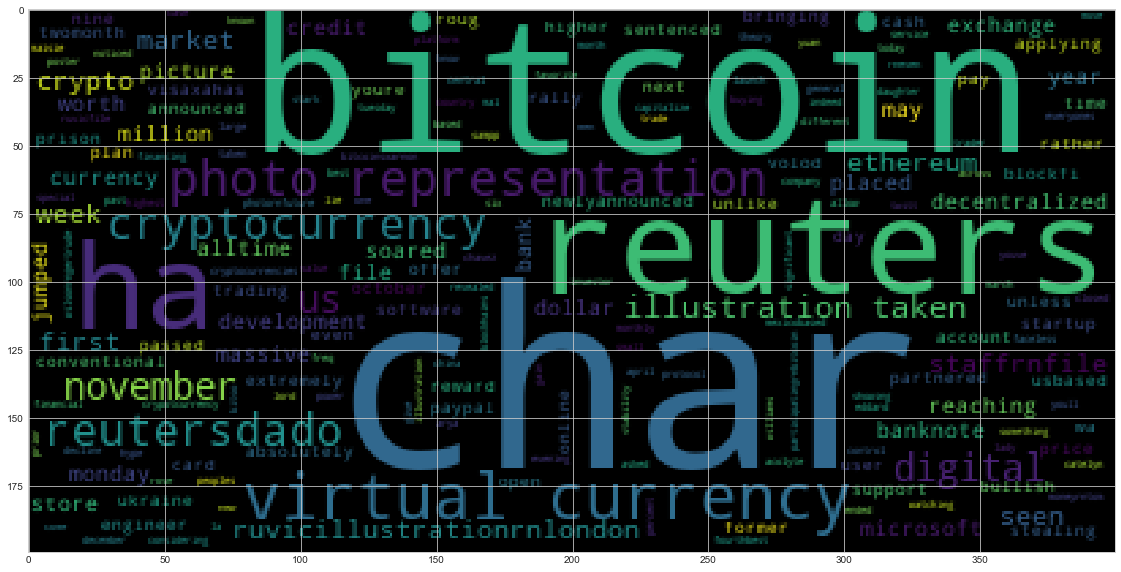

In [110]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(big_bitcoin)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_joined = ','.join (map (str, bitcoin_score['text']))
                           
bitcoin_joined

In [31]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!
bitcoin_ner = nlp(bitcoin_joined)
displacy.render(bitcoin_ner, style='ent')

In [ ]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)


---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_joined = ','.join (map (str, ethereum_score['text']))
                           
eth_joined

In [144]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_joined)
eth_ner
# Add a title to the document
# YOUR CODE HERE!

PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars],FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
LONDON (Reuters) - … [+1237 chars],FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
LONDON (Reuters) - … [+1237 chars],LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.
FILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars],NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second hi

In [146]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style='ent')

In [147]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
chars],FILE PHOTO: WORK_OF_ART
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
chars],NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
chars],NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
New York Times ORG
Coinbase ORG
chars],These NORP
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitco